Importing Important Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


Loading the dataset

In [2]:
df = pd.read_csv("Salary_Data.csv")
df.head(2)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0


## Question -  Build a prediction model for Salary_hike

Pre Processing Technique

In [3]:
#Shape of the data 
df.shape

(30, 2)

In [4]:
# Getting the data type information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


Handling the missing Values

In [5]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

There are no missing values and data types are correct.

Finding the Coorelation.

In [6]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


Data Visualization

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

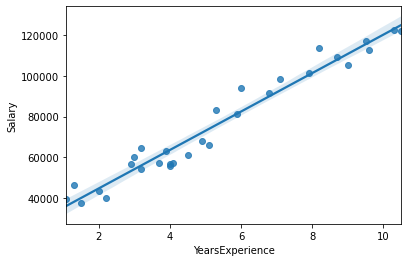

In [7]:
sns.regplot(x=df['YearsExperience'],y=df['Salary'])

By seeing above, we can conclude that the Salary is having best relationsip with the YearsExperience.

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

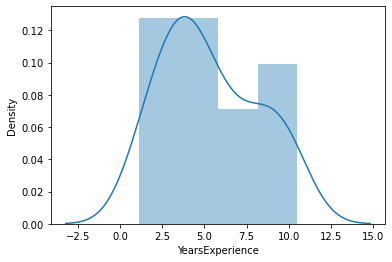

In [8]:
sns.distplot(df['YearsExperience'])


<AxesSubplot:xlabel='Salary', ylabel='Density'>

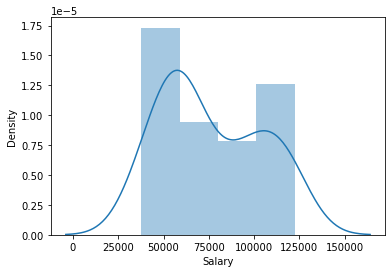

In [9]:
sns.distplot(df['Salary'])


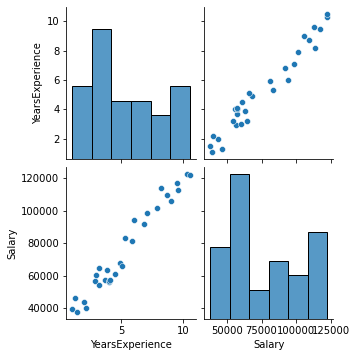

In [10]:
sns.pairplot(df)

### Machine Learning

In [11]:
X = df[["YearsExperience"]]
Y = df[["Salary"]] 

### Dividing the data into training and testing set.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Simple Regression Model

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()

Now training the above model with training set data.

In [16]:
model.fit(x_train,y_train)

LinearRegression()

## Predict the training set.

In [17]:
y_pred  = model.predict(x_test)

In [18]:
y_pred = [val[0] for val in y_pred]

## Compare The Training Set Answers With Predicted Answer

In [19]:
df_pred = pd.DataFrame({'Actual Answer': y_test["Salary"].values, "Predicted Answer":y_pred})
df_pred

,Actual Answer,Predicted Answer
0,112635.0,115790.210113
1,67938.0,71498.278095
2,113812.0,102596.868661
3,83088.0,75267.804224
4,64445.0,55477.792045
5,57189.0,60189.699707


## Finding The Errors and Efficency of the model

In [44]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R^2 Score :          ", metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 6286.453830757749
Mean Squared Error: 49830096.85590839
Root Mean Squared Error: 7059.04362190151
R^2 Score :           0.9024461774180497


# Logrithm Transformation

y= a+ b* log(x)

In [23]:
#Input Dataset or Predictor

X_log = np.log(df["YearsExperience"].values.reshape(-1,1))

#Output Dataset or Target 

Y_log = df["Salary"].values.reshape(-1,1)

In [24]:
X_train_log, X_test_log, Y_train_log, Y_test_log = train_test_split(X_log, Y_log, test_size=0.2, random_state=42)

In [25]:
y_pred_log = LinearRegression()
y_pred_log.fit(X_train_log, Y_train_log)

LinearRegression()

In [26]:
Y_pred_log = y_pred_log.predict(X_test_log)
Y_pred_log = [val[0] for val in Y_pred_log]

In [45]:
df1_pred = pd.DataFrame({"Actual": Y_test_log.flatten(), "Predict" : Y_pred_log})
df1_pred

,Actual,Predict
0,112635.0,105690.620022
1,67938.0,79261.674857
2,113812.0,99496.130896
3,83088.0,82345.445868
4,64445.0,62517.445762
5,57189.0,68222.796298


In [28]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_log, Y_pred_log))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_log, Y_pred_log) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_log, Y_pred_log)))
print("R^2 Score :          ", metrics.r2_score(Y_test_log, Y_pred_log))

Mean Absolute Error: 7714.638101223965
Mean Squared Error: 84567607.74831854
Root Mean Squared Error: 9196.064796874723
R^2 Score :           0.8344395471211845


# Exponential Transformation Model

log(Y) =α + βX + ε

In [30]:
#Input Dataset or Predictor

X_e_log = df["YearsExperience"].values.reshape(-1,1)

#Output Dataset or Target 

Y_e_log = np.log(df["Salary"].values.reshape(-1,1))

In [32]:
X_train_exp, X_test_exp, Y_train_exp, Y_test_exp = train_test_split(X_e_log, Y_e_log, test_size=0.2, random_state= 42)

In [33]:
y_pred_e_log = LinearRegression()
y_pred_e_log.fit(X_train_exp, Y_train_exp)

LinearRegression()

In [34]:
Y_pred_e_log = y_pred_e_log.predict(X_test_log)
Y_pred_e_log = [val[0] for val in Y_pred_e_log]

In [35]:
df1_pred = pd.DataFrame({"Actual": Y_test_log.flatten(), "Predict" : Y_pred_e_log})
df1_pred

,Actual,Predict
0,112635.0,10.772601
1,67938.0,10.687158
2,113812.0,10.752574
3,83088.0,10.697128
4,64445.0,10.633025
5,57189.0,10.651470


In [36]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_log, Y_pred_e_log))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_log, Y_pred_e_log) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_log, Y_pred_e_log)))
print("R^2 Score :          ", metrics.r2_score(Y_test_log, Y_pred_e_log))

Mean Absolute Error: 83173.8010073424
Mean Squared Error: 7428674963.914866
Root Mean Squared Error: 86189.7613636032
R^2 Score :           -13.543331945436488


## Quadratic Transformation Model

In [37]:
df["Sqr_YearsExp"] = df.apply(lambda row : row.YearsExperience**2, axis = 1)
df

,YearsExperience,Salary,Sqr_YearsExp
0,1.1,39343.0,1.21
1,1.3,46205.0,1.69
2,1.5,37731.0,2.25
3,2.0,43525.0,4.00
4,2.2,39891.0,4.84
5,2.9,56642.0,8.41
6,3.0,60150.0,9.00
7,3.2,54445.0,10.24
8,3.2,64445.0,10.24
9,3.7,57189.0,13.69


In [38]:
X_q = df.iloc[:,df.columns != 'YearsExperience']
Y_q = df.iloc[:,1]
X_train, X_test, Y_train, Y_test = train_test_split(X_q, Y_q, test_size=0.2, random_state= 42)
print(Y_test)


27    112635.0
15     67938.0
23    113812.0
17     83088.0
8      64445.0
9      57189.0
Name: Salary, dtype: float64


In [39]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [40]:
y_pred_q = model.predict(X_test)
y_pred_

array([112635.,  67938., 113812.,  83088.,  64445.,  57189.])

In [42]:
df_qm = pd.DataFrame({'Actual':Y_test, 'Predicted': y_pred_q})
df_qm.head()

,Actual,Predicted
27,112635.0,112635.0
15,67938.0,67938.0
23,113812.0,113812.0
17,83088.0,83088.0
8,64445.0,64445.0


In [43]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred_q))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred_q) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_q)))
print("R^2 Score :          ", metrics.r2_score(Y_test, y_pred_q))

Mean Absolute Error: 1.2126596023639044e-11
Mean Squared Error: 1.7646519734464591e-22
Root Mean Squared Error: 1.328402037579911e-11
R^2 Score :           1.0


# Conclusion

We have found that while transform the model, got various values for MAE, RMSE, MSE and R2
 Values. Summery of the following Models

